In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

In [38]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [39]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [40]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [41]:
tree = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=22, random_state=0)

In [42]:
tree.fit(trainX,trainY);

In [43]:
ypred=tree.predict(trainX)

In [44]:
c=accuracy_score(trainY,ypred)*100
c

96.96428571428571

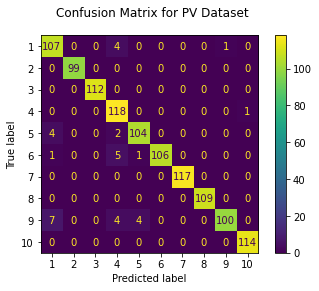

In [45]:
fig = plot_confusion_matrix(tree,trainX,trainY, display_labels=tree.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [46]:
ypred1=tree.predict(testX)

In [47]:
c1=accuracy_score(testY,ypred1)*100
c1

69.58333333333333

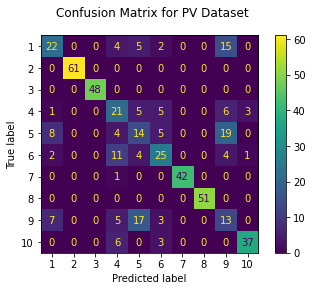

In [48]:
fig = plot_confusion_matrix(tree,testX,testY, display_labels=tree.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [49]:
YR=np.concatenate((trainY,testY),axis=0)

In [50]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [51]:
ac2=accuracy_score(YR,YP)*100
ac2

88.75

In [21]:
c2=confusion_matrix(YR,YP)
c2

array([[134,   0,   0,   2,  11,   5,   0,   0,   8,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0, 149,   6,   1,   0,   0,   3,   0],
       [  4,   0,   0,   3, 134,   3,   0,   0,  16,   0],
       [  7,   0,   0,  12,   3, 131,   0,   0,   7,   0],
       [  1,   0,   0,   0,   0,   0, 159,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  6,   0,   0,   3,  25,   2,   0,   0, 124,   0],
       [  0,   0,   0,   7,   1,   2,   0,   0,   0, 150]], dtype=int64)